# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd


def prepare_scoreboard(defeat, draw, victory):
    scoreboard = pd.concat([defeat, draw, victory])
    scoreboard.set_index(pd.Index((i, j) for i in range(len(scoreboard) // 10) for j in range(10)), inplace=True)
    return scoreboard

In [2]:
import os

datapath = os.path.join('datasets', '')

In [3]:
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import numpy as np
from sklearn.linear_model import SGDClassifier

range_ = range(1, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', index_col=0, usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', index_col=0, usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', index_col=0, usecols=range_)
scoreboard = prepare_scoreboard(defeat, draw, victory)

In [5]:
scoreboard.head(10)

ROLE   E   A   D   DMG     H   MIT     GAME
0 0     TANK   7   3   6  5933  1068  6199   DEFEAT
  1   DAMAGE   7   0  10  3601   747     0   DEFEAT
  2   DAMAGE   9   1   6  4352     0     0   DEFEAT
  3  SUPPORT   7   7   2  2332  6325     0   DEFEAT
  4  SUPPORT   6   4   2  3410  5979   606   DEFEAT
  5     TANK  14   0   4  4553     0  7781  VICTORY
  6   DAMAGE  16   0   3  6120     0  1271  VICTORY
  7   DAMAGE  17   0   3  7512  1215     0  VICTORY
  8  SUPPORT  15  16   2  4726  6868     0  VICTORY
  9  SUPPORT   7  12   1   856  6071   173  VICTORY

In [6]:
scoreboard.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1490 entries, (0, 0) to (148, 9)
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ROLE    1490 non-null   object
 1   E       1490 non-null   int64 
 2   A       1490 non-null   int64 
 3   D       1490 non-null   int64 
 4   DMG     1490 non-null   int64 
 5   H       1490 non-null   int64 
 6   MIT     1490 non-null   int64 
 7   GAME    1490 non-null   object
dtypes: int64(6), object(2)
memory usage: 103.1+ KB


In [7]:
scoreboard['GAME'].value_counts()

GAME
DEFEAT     740
VICTORY    740
DRAW        10
Name: count, dtype: int64

In [8]:
scoreboard.describe()

,E,A,D,DMG,H,MIT
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,13.657047,7.457047,6.269799,6231.367785,3875.580537,2284.940940
std,9.932335,8.497531,3.822940,4521.140520,5221.405209,4562.899254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2649.000000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5328.000000,759.500000,235.500000
75%,20.000000,12.000000,9.000000,9450.000000,7474.500000,1797.750000
max,56.000000,48.000000,21.000000,29354.000000,27756.000000,28366.000000


In [9]:
import matplotlib.pyplot as plt

# 그림을 저장할 위치
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

그림 저장: attribute_histogram_plots


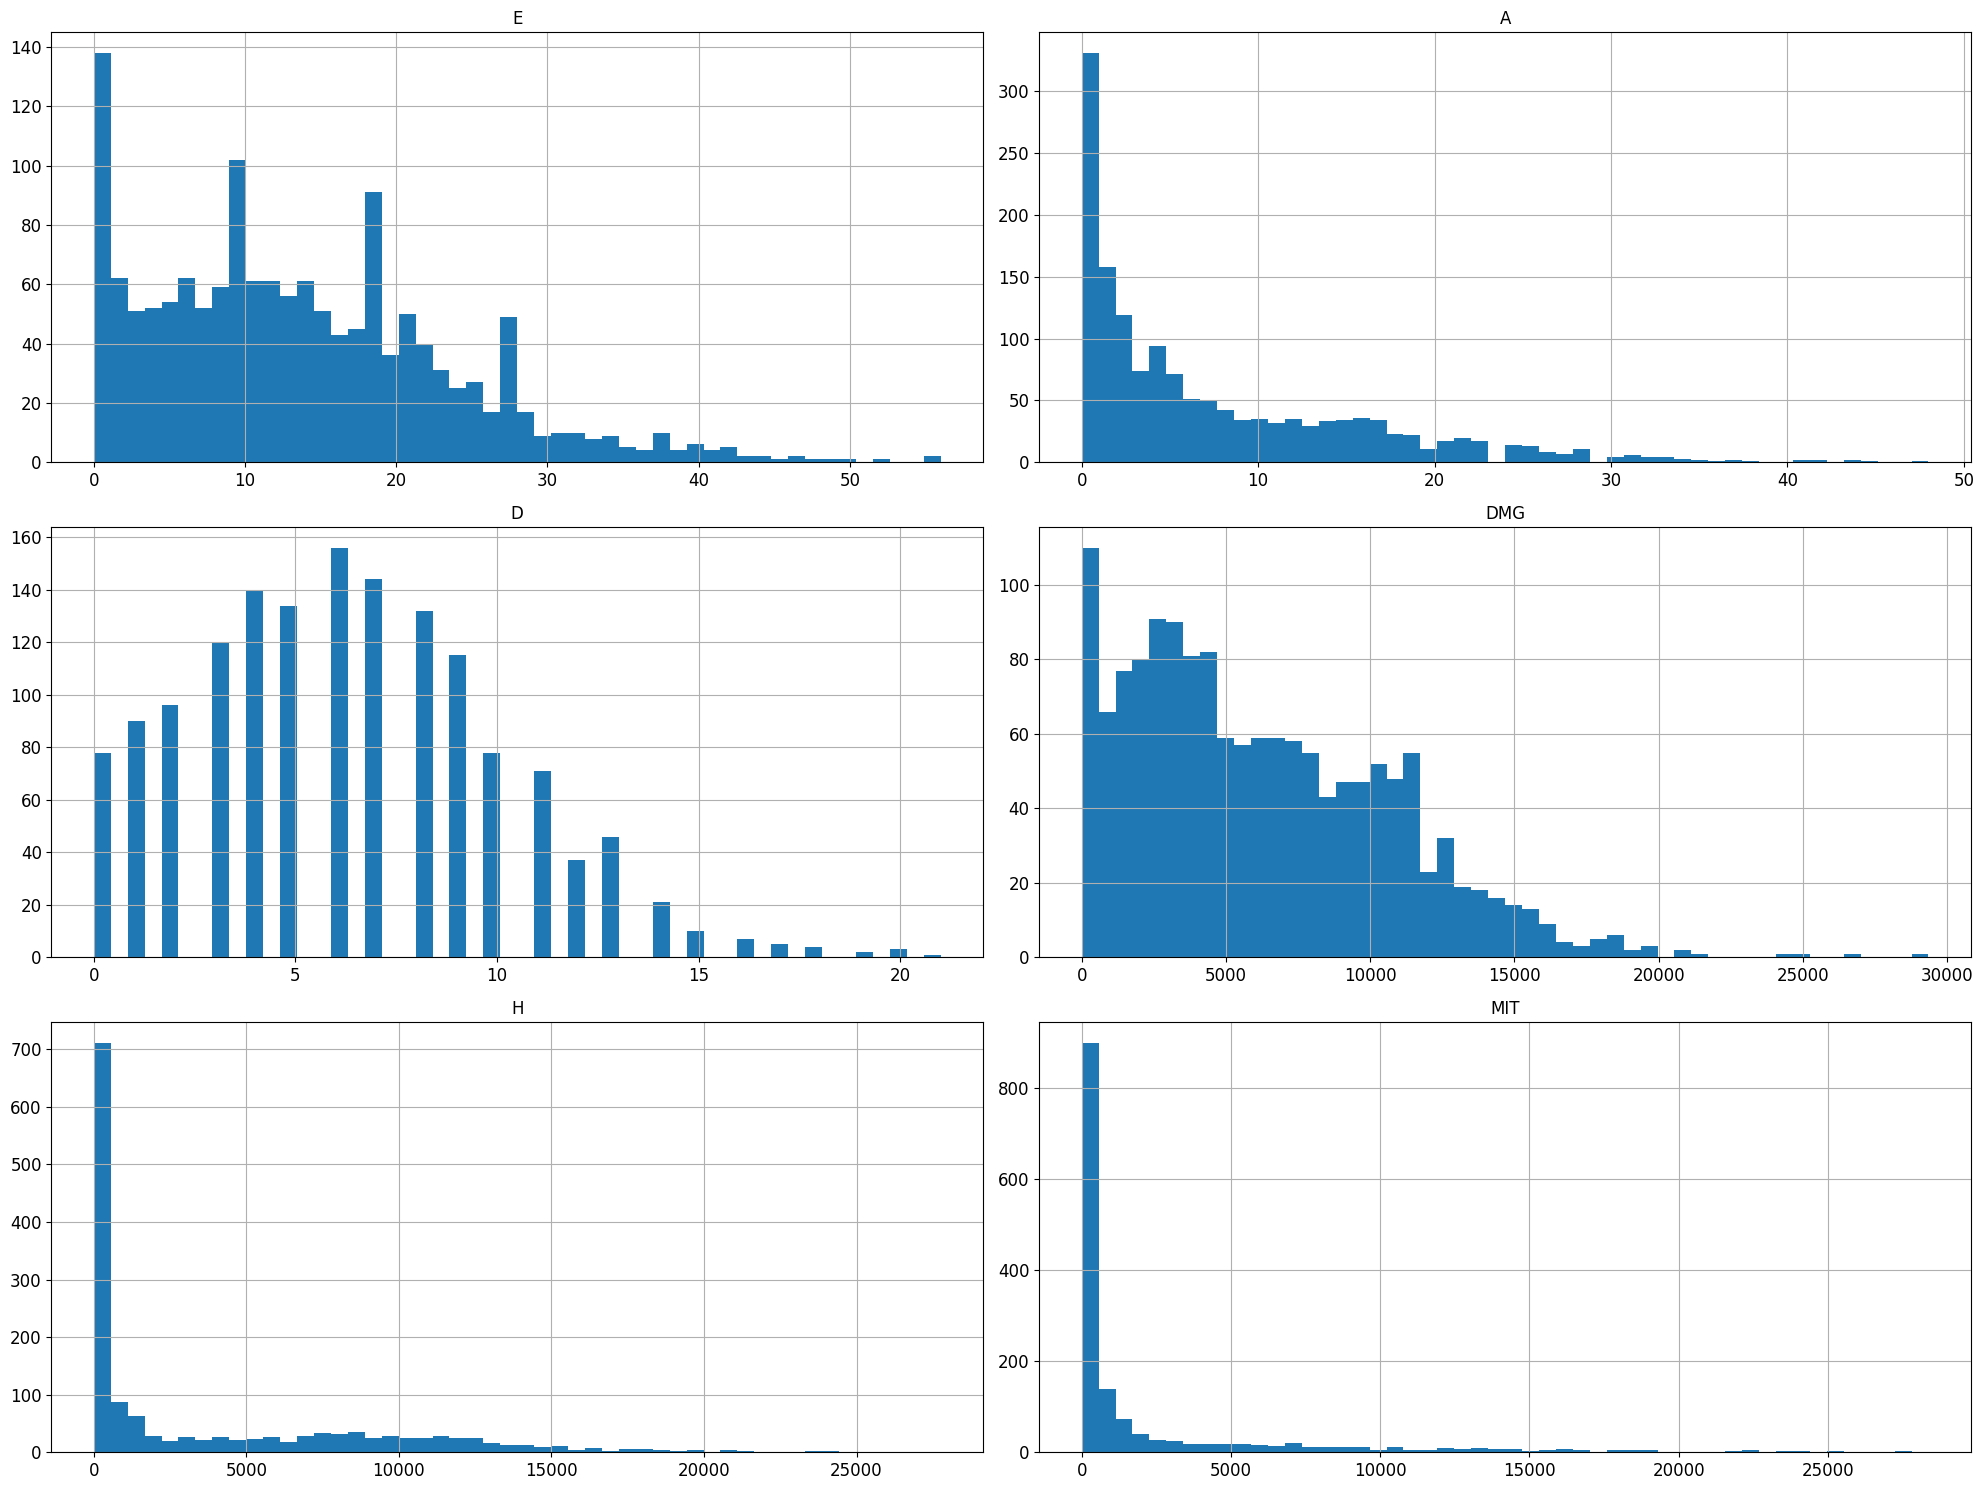

In [10]:
scoreboard.hist(bins=50, figsize=(20, 15))
save_fig('attribute_histogram_plots')
plt.show()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1)
for train_index, test_index in split.split(scoreboard, scoreboard['GAME']):
    strat_train_set = scoreboard.loc[train_index[train_index % 10 == 0] // 10]
    strat_test_set = scoreboard.loc[test_index[test_index % 10 == 0] // 10]

In [12]:
strat_test_set['GAME'].value_counts() / len(strat_test_set)

GAME
DEFEAT     0.5
VICTORY    0.5
Name: count, dtype: float64

In [13]:
scoreboard['GAME'].value_counts() / len(scoreboard)

GAME
DEFEAT     0.496644
VICTORY    0.496644
DRAW       0.006711
Name: count, dtype: float64

In [14]:
scoreboard = strat_train_set.copy()

In [15]:
scoreboard['E_per_D'] = scoreboard['E'] / scoreboard['D']

In [16]:
scoreboard.describe()

,E,A,D,DMG,H,MIT,E_per_D
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1350.000000
mean,13.832847,7.560584,6.348905,6312.294891,3930.827737,2316.127007,inf
std,10.080636,8.598226,3.853529,4577.757194,5283.404393,4616.136958,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2691.750000,0.000000,0.000000,1.000000
50%,13.000000,4.000000,6.000000,5353.000000,807.000000,244.000000,2.000000
75%,20.000000,12.000000,9.000000,9577.250000,7568.500000,1886.250000,3.833333
max,56.000000,48.000000,21.000000,29354.000000,27756.000000,28366.000000,inf


In [17]:
scoreboard = strat_train_set.drop(['GAME'], axis=1)
scoreboard_labels = strat_train_set['GAME'].copy()[::10]

In [18]:
scoreboard_num = scoreboard.drop(['ROLE'], axis=1)

In [19]:
scoreboard_cat = scoreboard[['ROLE']]
scoreboard_cat.head(10)

ROLE
18 0     TANK
   1   DAMAGE
   2   DAMAGE
   3  SUPPORT
   4  SUPPORT
   5     TANK
   6   DAMAGE
   7   DAMAGE
   8  SUPPORT
   9  SUPPORT

In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
scoreboard_cat_1hot = cat_encoder.fit_transform(scoreboard_cat)
scoreboard_cat_1hot

<1370x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1370 stored elements in Compressed Sparse Row format>

In [21]:
scoreboard_cat_1hot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [22]:
cat_encoder.categories_

[array(['DAMAGE', 'SUPPORT', 'TANK'], dtype=object)]

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = 'E', 'D'
e_ix, d_ix = [scoreboard_num.columns.get_loc(c) for c in col_names]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.to_numpy(np.float64)
        d = X[:, d_ix]
        d[d == 0] = 0.5
        e_per_d = X[:, e_ix] / d
        return np.c_[X, e_per_d]


attr_adder = CombinedAttributesAdder()
scoreboard_extra_attribs = attr_adder.transform(scoreboard_num)

In [24]:
scoreboard_extra_attribs = pd.DataFrame(
    scoreboard_extra_attribs, scoreboard_num.index, list(scoreboard_num.columns) + ['E_per_D']
)
scoreboard_extra_attribs.head(10)

E     A    D     DMG       H     MIT    E_per_D
18 0   6.0   1.0  5.0  3686.0     0.0  4235.0   1.200000
   1   2.0   0.0  4.0  4112.0     0.0     0.0   0.500000
   2   4.0   1.0  3.0  2672.0  1114.0     0.0   1.333333
   3   0.0   0.0  5.0  1160.0  2553.0   353.0   0.000000
   4   1.0   1.0  4.0   996.0  3762.0   132.0   0.250000
   5  11.0   1.0  1.0  3245.0     0.0  6411.0  11.000000
   6  11.0   0.0  0.5  5210.0     0.0     0.0  22.000000
   7   8.0   0.0  2.0  5020.0     0.0    99.0   4.000000
   8   0.0   4.0  3.0   643.0  4182.0    18.0   0.000000
   9   1.0  10.0  1.0   729.0  6626.0     0.0   1.000000

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler())])
scoreboard_num_tr = num_pipeline.fit_transform(scoreboard_num)

In [26]:
scoreboard_num_tr

array([[-0.77730282, -0.76329462, -0.36061863, ..., -0.74426692,
         0.41583985, -0.44800446],
       [-1.17424807, -0.87964015, -0.62299118, ..., -0.74426692,
        -0.50192895, -0.5787627 ],
       [-0.97577544, -0.76329462, -0.88536374, ..., -0.53334103,
        -0.50192895, -0.42309813],
       ...,
       [-0.77730282, -0.64694909, -0.09824607, ..., -0.74426692,
        -0.50192895, -0.48536396],
       [-0.77730282,  0.05112409, -0.88536374, ..., -0.04824934,
        -0.50192895, -0.29856648],
       [-1.27348438, -0.53060356, -0.09824607, ...,  0.12386164,
        -0.50192895, -0.64102852]])

In [27]:
from sklearn.compose import ColumnTransformer

num_attribs = list(scoreboard_num)
cat_attribs = ['ROLE']
full_pipeline = ColumnTransformer(
    [('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(), cat_attribs)], n_jobs=-1
)
scoreboard_prepared = full_pipeline.fit_transform(scoreboard).reshape(-1, 100)

In [28]:
scoreboard_prepared

array([[-0.77730282, -0.76329462, -0.36061863, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.41353292, -0.41425803, -0.88536374, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.90971448,  0.51650622, -1.54129513, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.47959388, -0.41425803,  0.16412648, ...,  0.        ,
         1.        ,  0.        ],
       [-1.07501176, -0.87964015, -1.1477363 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.11582399, -0.76329462, -0.88536374, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
scoreboard_prepared.shape

(137, 100)

In [30]:
test_prepared = full_pipeline.transform(strat_test_set.drop(['GAME'], axis=1)).reshape(-1, 100)
test_labels = strat_test_set['GAME'].copy()[::10]

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(n_jobs=-1)
sgd_clf.fit(scoreboard_prepared, scoreboard_labels)

SGDClassifier(n_jobs=-1)

In [32]:
print(test_labels.values)
print(sgd_clf.predict(test_prepared))

['DEFEAT' 'VICTORY' 'DEFEAT' 'VICTORY' 'DEFEAT' 'DEFEAT' 'VICTORY'
 'DEFEAT' 'DEFEAT' 'DEFEAT' 'DEFEAT' 'VICTORY']
['DEFEAT' 'VICTORY' 'DEFEAT' 'VICTORY' 'DEFEAT' 'DEFEAT' 'VICTORY'
 'DEFEAT' 'DEFEAT' 'DEFEAT' 'DEFEAT' 'VICTORY']


In [33]:
sgd_clf.score(test_prepared, test_labels)

1.0